In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

from sklearn.datasets import load_diabetes, load_breast_cancer, load_digits
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

# Autoreload of the files
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
X, y = load_diabetes(return_X_y=True)

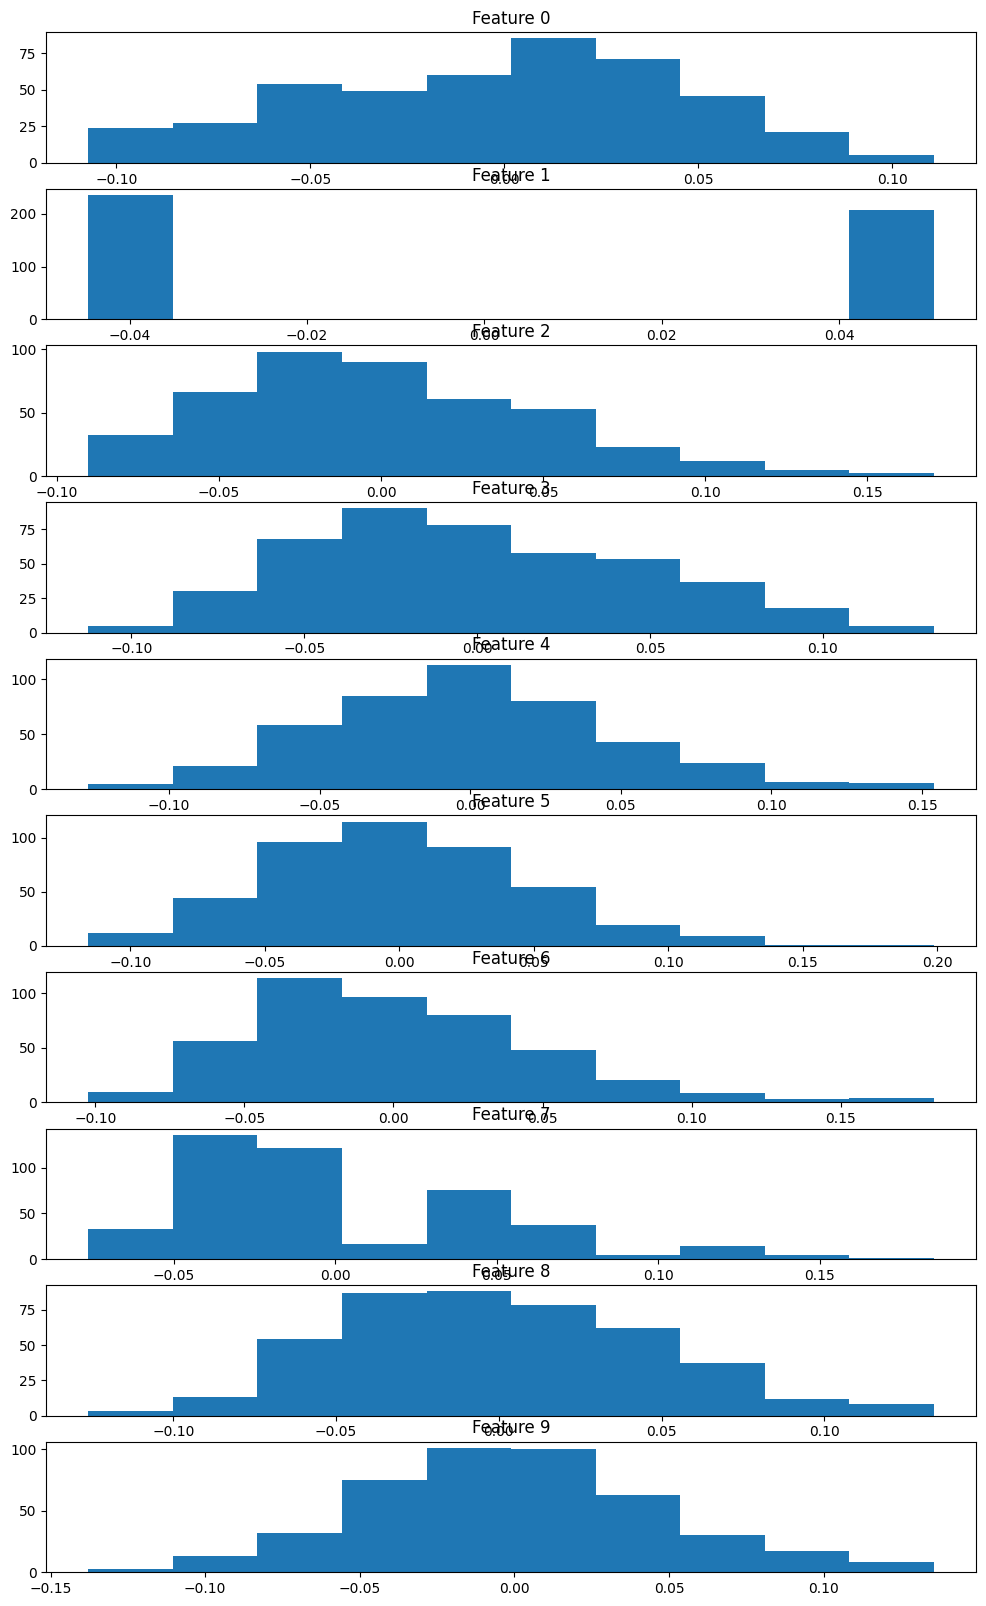

In [17]:
# Plot all features
fig, axs = plt.subplots(10, 1, figsize=(12, 20))
for idx in range(10):
    axs[idx].hist(X[:,idx])
    axs[idx].set_title(f"Feature {idx}")
plt.show()

In [18]:
# Transform feature at idx 1 to one-hot encoding
X[:,1] = np.where(X[:,1] > 0, 1, 0)
print(X[:,1])

[1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1.
 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0.
 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0.
 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0.
 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0.
 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0.
 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1.
 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1.
 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0.
 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1.
 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0.
 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0.
 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0.

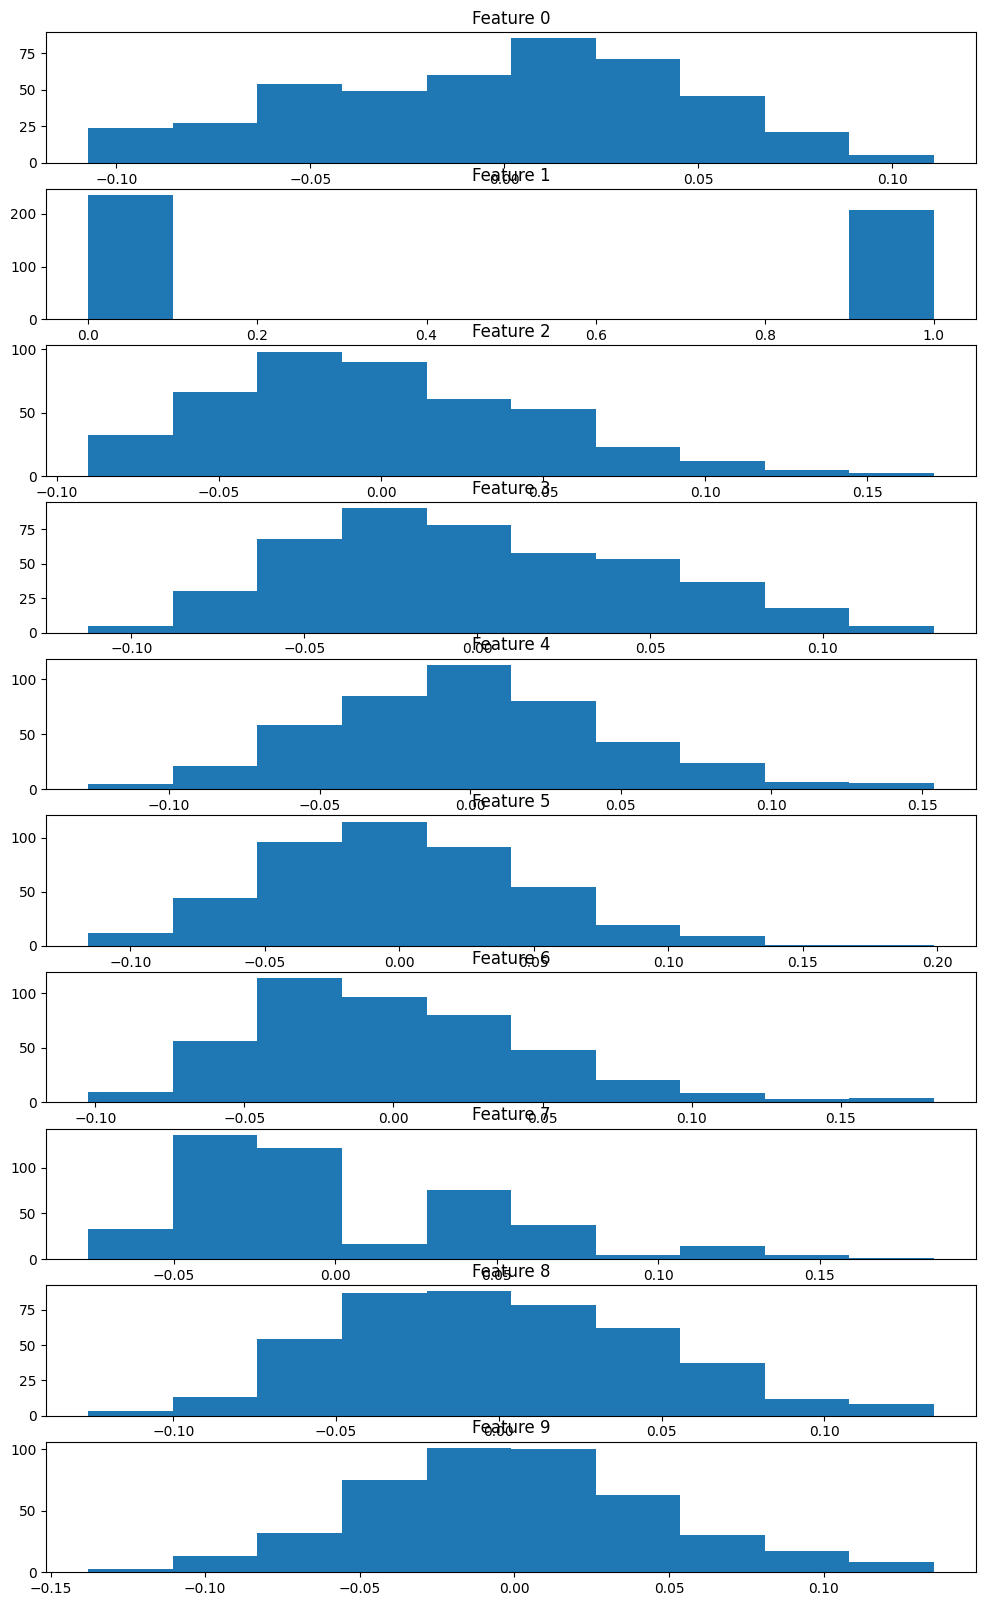

In [19]:
# Plot all features
fig, axs = plt.subplots(10, 1, figsize=(12, 20))
for idx in range(10):
    axs[idx].hist(X[:,idx])
    axs[idx].set_title(f"Feature {idx}")
plt.show()

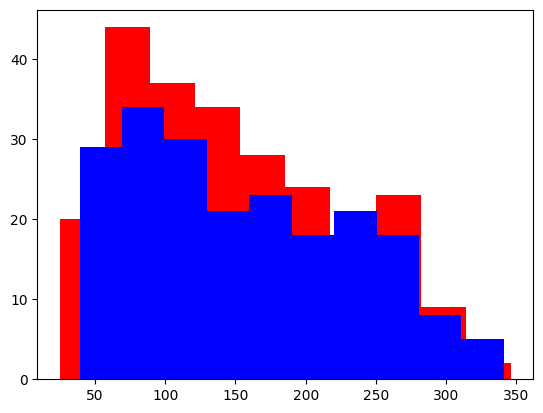

In [23]:
# PLot response variable 
plt.hist(y[X[:,1] == 0], color = 'red')
plt.hist(y[X[:,1] == 1], color = 'blue')
plt.show()


# Gradient Boosting models
***

In [43]:
# Gradient Boosting models
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = GradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('Xtrain :', len(X_train))
print("R2 score: ", model.score(X_test, y_test))
print("R2 score: ", r2_score(y_test, y_pred))

Xtrain : 353
R2 score:  0.4529343796683363
R2 score:  0.4529343796683363


In [48]:
from itertools import product

# Cross validate hyperparameters
min_leafs = [0.01,0.02, 0.04, 0.06, 0.08, 0.1]
criterion = ['friedman_mse']
max_depth = [None, 2, 3, 4]
learning_rates = [1e-4, 1e-3, 1e-2, 1e-1]
n_estimators = [100]
subsample = [0.6, 0.8, 1.0]

# Shuffle possibilities
all_possibilities = list(product(min_leafs, criterion, max_depth, learning_rates, n_estimators, subsample))
np.random.shuffle(all_possibilities)
names = ["min_leaf", "criterion", "max_depth", "learning_rate", "n_estimators", "subsample"]

# Cross validate
best_r2 = -np.inf
for possibility in all_possibilities:
    min_leaf, c, max_d, lr, n_estimator, sub = possibility
    r2_scores = []
    for train_index, val_index in KFold(n_splits=4).split(X_train):
        X_sub_train, X_val = X_train[train_index], X_train[val_index]
        y_sub_train, y_val = y_train[train_index], y_train[val_index]

        model = GradientBoostingRegressor(min_samples_leaf=min_leaf,
            criterion=c,
            max_depth=max_d,
            learning_rate=lr,
            n_estimators=n_estimator,
            subsample=sub,
            random_state=42
        )

        model.fit(X_sub_train, y_sub_train)
        y_pred = model.predict(X_val)
        r2_scores.append(r2_score(y_val, y_pred))

    if np.mean(r2_scores) > best_r2:
        best_r2 = np.mean(r2_scores)
        best_possibility = possibility
    print('----------------------------')
    print("Best R2 score: ", best_r2)
    print("min_leaf: ", best_possibility[0], " / criterion: ", best_possibility[1], " / max_depth: ", best_possibility[2], " / learning_rate: ", best_possibility[3], " / n_estimators: ", best_possibility[4], " / subsample: ", best_possibility[5])
    print('----------------------------')

----------------------------
Best R2 score:  0.37782419819168006
min_leaf:  0.01  / criterion:  friedman_mse  / max_depth:  4  / learning_rate:  0.1  / n_estimators:  100  / subsample:  0.8
----------------------------
----------------------------
Best R2 score:  0.37782419819168006
min_leaf:  0.01  / criterion:  friedman_mse  / max_depth:  4  / learning_rate:  0.1  / n_estimators:  100  / subsample:  0.8
----------------------------
----------------------------
Best R2 score:  0.37782419819168006
min_leaf:  0.01  / criterion:  friedman_mse  / max_depth:  4  / learning_rate:  0.1  / n_estimators:  100  / subsample:  0.8
----------------------------
----------------------------
Best R2 score:  0.38235005657737087
min_leaf:  0.02  / criterion:  friedman_mse  / max_depth:  3  / learning_rate:  0.1  / n_estimators:  100  / subsample:  0.6
----------------------------
----------------------------
Best R2 score:  0.38235005657737087
min_leaf:  0.02  / criterion:  friedman_mse  / max_depth:  

Best R2 score:  0.4344395375272423
min_leaf:  0.06  / criterion:  squared_error  / max_depth:  None  / learning_rate:  0.01  / n_estimators:  200  / subsample:  0.8

In [ ]:
model_1 = GradientBoostingRegressor(min_samples_leaf=0.06,
    criterion='squared_error',
    max_depth=None,
    learning_rate=0.01,
    n_estimators=200,
    subsample=0.8,
    random_state=42
)
model_1.fit(X_train, y_train)

y_pred = model_1.predict(X_test)
print(r2_score(y_test, y_pred))

0.4785103271131439


Best R2 score:  0.43781569665925324
min_leaf:  0.1  / criterion:  friedman_mse  / max_depth:  None  / learning_rate:  0.1  / n_estimators:  100  / subsample:  0.6

In [50]:
model_2 = GradientBoostingRegressor(min_samples_leaf=0.1,
    criterion='friedman_mse',
    max_depth=None,
    learning_rate=0.1,
    n_estimators=100,
    subsample=0.6,
    random_state=42
)
model_2.fit(X_train, y_train)

y_pred = model_2.predict(X_test)
print(r2_score(y_test, y_pred))

0.45720856711026603


# Time series analysis
Air passenger data set from statsmodels
***

In [4]:
# Load data set
from statsmodels.datasets import get_rdataset
air_passengers = get_rdataset("AirPassengers")

In [5]:
import numpy as np
import pandas as pd
from statsmodels.datasets import get_rdataset
from statsmodels.tsa.seasonal import STL
from scipy.fft import fft
from scipy.signal import find_peaks
from statsmodels.tsa.stattools import acf

# Load dataset
data = get_rdataset("AirPassengers").data
data['time'] = pd.date_range(start='1949-01', periods=len(data), freq='ME')
data.set_index('time', inplace=True)
ts = data['value']  # time series of number of air passengers

# --- 1. Trend/Cycle: STL Decomposition ---
stl = STL(ts, seasonal=13)
res = stl.fit()
trend = res.trend
residual = res.resid

# Feature: slope of the trend (last year)
trend_slope = (trend.iloc[-1] - trend.iloc[-12]) / 12

# --- 2. Fourier Transform: dominant frequency ---
fft_vals = np.abs(fft(ts - ts.mean()))
fft_freqs = np.fft.fftfreq(len(ts), d=1)
dominant_freq = fft_freqs[np.argmax(fft_vals[1:]) + 1]  # exclude DC component

# --- 3. Autocorrelation (lag 1, 12) ---
autocorr_vals = acf(ts, nlags=12, fft=True)
acf_lag1 = autocorr_vals[1]
acf_lag12 = autocorr_vals[12]

# --- 4. Peaks, valleys, zero crossings ---
peaks, _ = find_peaks(ts)
valleys, _ = find_peaks(-ts)
zero_crossings = np.where(np.diff(np.sign(ts - ts.mean())))[0]

# Collect features
features = {
    "trend_slope": trend_slope,
    "dominant_frequency": dominant_freq,
    "acf_lag1": acf_lag1,
    "acf_lag12": acf_lag12,
    "num_peaks": len(peaks),
    "num_valleys": len(valleys),
    "num_zero_crossings": len(zero_crossings)
}

# Show features
print("Extracted Features:")
for k, v in features.items():
    print(f"{k}: {v}")

Extracted Features:
trend_slope: 3.2313689573425157
dominant_frequency: 0.006944444444444444
acf_lag1: 0.9480473407524913
acf_lag12: 0.7603950422625557
num_peaks: 30
num_valleys: 30
num_zero_crossings: 9


{'trend_slope': np.float64(3.2313689573425157),
 'dominant_frequency': np.float64(0.006944444444444444),
 'acf_lag1': np.float64(0.9480473407524913),
 'acf_lag12': np.float64(0.7603950422625557),
 'num_peaks': 30,
 'num_valleys': 30,
 'num_zero_crossings': 9}